In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from numpy import concatenate
from math import sqrt

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
stat_file = pd.read_excel('./stat.xls')

In [3]:
stat_file

,통계표명:,금리 추이,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190
0,단위:,기간중 평균금리 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2003\r\n01월,2003\r\n02월,2003\r\n03월,2003\r\n04월,2003\r\n05월,2003\r\n06월,2003\r\n07월,2003\r\n08월,2003\r\n09월,...,2018\r\n01월,2018\r\n02월,2018\r\n03월,2018\r\n04월,2018\r\n05월,2018\r\n06월,2018\r\n07월,2018\r\n08월,2018\r\n09월,2018\r\n10월
2,"국고채(1년,평균)",4.79,4.63,4.72,4.60,4.30,4.28,4.27,4.15,4.07,...,1.84,1.85,1.88,1.87,1.89,1.85,1.84,1.83,1.79,1.85
3,"국고채(3년,평균)",4.96,4.73,4.78,4.60,4.27,4.07,4.37,4.62,4.25,...,2.19,2.28,2.27,2.19,2.25,2.18,2.10,2.02,1.95,2.01
4,"국고채(5년,평균)",5.15,4.89,4.94,4.77,4.41,4.19,4.63,4.93,4.46,...,2.44,2.54,2.50,2.44,2.53,2.44,2.34,2.24,2.13,2.16
5,"국고채(10년,평균)",5.43,5.15,5.20,5.03,4.68,4.46,4.95,5.26,4.77,...,2.63,2.77,2.71,2.66,2.76,2.66,2.55,2.46,2.32,2.34
6,"회사채수익율(AA-,평균)",5.48,5.25,5.44,5.39,5.26,5.28,5.65,5.87,5.24,...,2.72,2.82,2.83,2.79,2.86,2.81,2.75,2.66,2.40,2.45
7,콜금리(평균)1일물,4.28,4.30,4.24,4.24,4.06,4.01,3.82,3.74,3.74,...,1.49,1.49,1.49,1.47,1.50,1.49,1.49,1.50,1.54,1.52
8,"예금은행수신(신규취급액,저축성)",4.63,4.45,4.30,4.33,4.22,4.15,4.09,3.94,3.85,...,1.80,1.80,1.85,1.82,1.84,1.87,1.82,1.81,1.84,-
9,예금은행대출(신규취급액),6.51,6.39,6.48,6.41,6.28,6.24,6.20,6.03,5.97,...,3.69,3.68,3.67,3.65,3.68,3.65,3.67,3.63,3.61,-


In [4]:
date_col = stat_file.iloc[1]
date_col

통계표명:                   NaN
금리 추이           2003\r\n01월
Unnamed: 2      2003\r\n02월
Unnamed: 3      2003\r\n03월
Unnamed: 4      2003\r\n04월
Unnamed: 5      2003\r\n05월
Unnamed: 6      2003\r\n06월
Unnamed: 7      2003\r\n07월
Unnamed: 8      2003\r\n08월
Unnamed: 9      2003\r\n09월
Unnamed: 10     2003\r\n10월
Unnamed: 11     2003\r\n11월
Unnamed: 12     2003\r\n12월
Unnamed: 13     2004\r\n01월
Unnamed: 14     2004\r\n02월
Unnamed: 15     2004\r\n03월
Unnamed: 16     2004\r\n04월
Unnamed: 17     2004\r\n05월
Unnamed: 18     2004\r\n06월
Unnamed: 19     2004\r\n07월
Unnamed: 20     2004\r\n08월
Unnamed: 21     2004\r\n09월
Unnamed: 22     2004\r\n10월
Unnamed: 23     2004\r\n11월
Unnamed: 24     2004\r\n12월
Unnamed: 25     2005\r\n01월
Unnamed: 26     2005\r\n02월
Unnamed: 27     2005\r\n03월
Unnamed: 28     2005\r\n04월
Unnamed: 29     2005\r\n05월
                   ...     
Unnamed: 161    2016\r\n05월
Unnamed: 162    2016\r\n06월
Unnamed: 163    2016\r\n07월
Unnamed: 164    2016\r\n08월
Unnamed: 165    2016

In [5]:
stat_file = stat_file.drop([stat_file.index[0],stat_file.index[1], stat_file.index[12], stat_file.index[13]])

In [6]:
stat_file

,통계표명:,금리 추이,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190
2,"국고채(1년,평균)",4.79,4.63,4.72,4.60,4.30,4.28,4.27,4.15,4.07,...,1.84,1.85,1.88,1.87,1.89,1.85,1.84,1.83,1.79,1.85
3,"국고채(3년,평균)",4.96,4.73,4.78,4.60,4.27,4.07,4.37,4.62,4.25,...,2.19,2.28,2.27,2.19,2.25,2.18,2.10,2.02,1.95,2.01
4,"국고채(5년,평균)",5.15,4.89,4.94,4.77,4.41,4.19,4.63,4.93,4.46,...,2.44,2.54,2.50,2.44,2.53,2.44,2.34,2.24,2.13,2.16
5,"국고채(10년,평균)",5.43,5.15,5.20,5.03,4.68,4.46,4.95,5.26,4.77,...,2.63,2.77,2.71,2.66,2.76,2.66,2.55,2.46,2.32,2.34
6,"회사채수익율(AA-,평균)",5.48,5.25,5.44,5.39,5.26,5.28,5.65,5.87,5.24,...,2.72,2.82,2.83,2.79,2.86,2.81,2.75,2.66,2.40,2.45
7,콜금리(평균)1일물,4.28,4.30,4.24,4.24,4.06,4.01,3.82,3.74,3.74,...,1.49,1.49,1.49,1.47,1.50,1.49,1.49,1.50,1.54,1.52
8,"예금은행수신(신규취급액,저축성)",4.63,4.45,4.30,4.33,4.22,4.15,4.09,3.94,3.85,...,1.80,1.80,1.85,1.82,1.84,1.87,1.82,1.81,1.84,-
9,예금은행대출(신규취급액),6.51,6.39,6.48,6.41,6.28,6.24,6.20,6.03,5.97,...,3.69,3.68,3.67,3.65,3.68,3.65,3.67,3.63,3.61,-
10,CD(91일),4.70,4.54,4.76,4.62,4.39,4.28,4.15,3.90,3.83,...,1.66,1.65,1.65,1.65,1.65,1.65,1.65,1.65,1.65,1.68
11,"미T/N(10년,말)",3.96,3.69,3.80,3.84,3.36,3.52,4.40,4.45,3.95,...,2.71,2.86,2.74,2.95,2.86,2.86,2.96,2.86,3.06,3.14


In [7]:
stat_file.columns = date_col

In [8]:
stat_file

1,nan,2003 01월,2003 02월,2003 03월,2003 04월,2003 05월,2003 06월,2003 07월,2003 08월,2003 09월,...,2018 01월,2018 02월,2018 03월,2018 04월,2018 05월,2018 06월,2018 07월,2018 08월,2018 09월,2018 10월
2,"국고채(1년,평균)",4.79,4.63,4.72,4.60,4.30,4.28,4.27,4.15,4.07,...,1.84,1.85,1.88,1.87,1.89,1.85,1.84,1.83,1.79,1.85
3,"국고채(3년,평균)",4.96,4.73,4.78,4.60,4.27,4.07,4.37,4.62,4.25,...,2.19,2.28,2.27,2.19,2.25,2.18,2.10,2.02,1.95,2.01
4,"국고채(5년,평균)",5.15,4.89,4.94,4.77,4.41,4.19,4.63,4.93,4.46,...,2.44,2.54,2.50,2.44,2.53,2.44,2.34,2.24,2.13,2.16
5,"국고채(10년,평균)",5.43,5.15,5.20,5.03,4.68,4.46,4.95,5.26,4.77,...,2.63,2.77,2.71,2.66,2.76,2.66,2.55,2.46,2.32,2.34
6,"회사채수익율(AA-,평균)",5.48,5.25,5.44,5.39,5.26,5.28,5.65,5.87,5.24,...,2.72,2.82,2.83,2.79,2.86,2.81,2.75,2.66,2.40,2.45
7,콜금리(평균)1일물,4.28,4.30,4.24,4.24,4.06,4.01,3.82,3.74,3.74,...,1.49,1.49,1.49,1.47,1.50,1.49,1.49,1.50,1.54,1.52
8,"예금은행수신(신규취급액,저축성)",4.63,4.45,4.30,4.33,4.22,4.15,4.09,3.94,3.85,...,1.80,1.80,1.85,1.82,1.84,1.87,1.82,1.81,1.84,-
9,예금은행대출(신규취급액),6.51,6.39,6.48,6.41,6.28,6.24,6.20,6.03,5.97,...,3.69,3.68,3.67,3.65,3.68,3.65,3.67,3.63,3.61,-
10,CD(91일),4.70,4.54,4.76,4.62,4.39,4.28,4.15,3.90,3.83,...,1.66,1.65,1.65,1.65,1.65,1.65,1.65,1.65,1.65,1.68
11,"미T/N(10년,말)",3.96,3.69,3.80,3.84,3.36,3.52,4.40,4.45,3.95,...,2.71,2.86,2.74,2.95,2.86,2.86,2.96,2.86,3.06,3.14


In [9]:
stat_file = stat_file.T

In [10]:
stat_file

,2,3,4,5,6,7,8,9,10,11
1,,,,,,,,,,
NaN,"국고채(1년,평균)","국고채(3년,평균)","국고채(5년,평균)","국고채(10년,평균)","회사채수익율(AA-,평균)",콜금리(평균)1일물,"예금은행수신(신규취급액,저축성)",예금은행대출(신규취급액),CD(91일),"미T/N(10년,말)"
2003\r\n01월,4.79,4.96,5.15,5.43,5.48,4.28,4.63,6.51,4.70,3.96
2003\r\n02월,4.63,4.73,4.89,5.15,5.25,4.30,4.45,6.39,4.54,3.69
2003\r\n03월,4.72,4.78,4.94,5.20,5.44,4.24,4.30,6.48,4.76,3.80
2003\r\n04월,4.60,4.60,4.77,5.03,5.39,4.24,4.33,6.41,4.62,3.84
2003\r\n05월,4.30,4.27,4.41,4.68,5.26,4.06,4.22,6.28,4.39,3.36
2003\r\n06월,4.28,4.07,4.19,4.46,5.28,4.01,4.15,6.24,4.28,3.52
2003\r\n07월,4.27,4.37,4.63,4.95,5.65,3.82,4.09,6.20,4.15,4.40
2003\r\n08월,4.15,4.62,4.93,5.26,5.87,3.74,3.94,6.03,3.90,4.45


In [11]:
stat_file = stat_file.reset_index()
stat_file

,1,2,3,4,5,6,7,8,9,10,11
0,NaN,"국고채(1년,평균)","국고채(3년,평균)","국고채(5년,평균)","국고채(10년,평균)","회사채수익율(AA-,평균)",콜금리(평균)1일물,"예금은행수신(신규취급액,저축성)",예금은행대출(신규취급액),CD(91일),"미T/N(10년,말)"
1,2003\r\n01월,4.79,4.96,5.15,5.43,5.48,4.28,4.63,6.51,4.70,3.96
2,2003\r\n02월,4.63,4.73,4.89,5.15,5.25,4.30,4.45,6.39,4.54,3.69
3,2003\r\n03월,4.72,4.78,4.94,5.20,5.44,4.24,4.30,6.48,4.76,3.80
4,2003\r\n04월,4.60,4.60,4.77,5.03,5.39,4.24,4.33,6.41,4.62,3.84
5,2003\r\n05월,4.30,4.27,4.41,4.68,5.26,4.06,4.22,6.28,4.39,3.36
6,2003\r\n06월,4.28,4.07,4.19,4.46,5.28,4.01,4.15,6.24,4.28,3.52
7,2003\r\n07월,4.27,4.37,4.63,4.95,5.65,3.82,4.09,6.20,4.15,4.40
8,2003\r\n08월,4.15,4.62,4.93,5.26,5.87,3.74,3.94,6.03,3.90,4.45
9,2003\r\n09월,4.07,4.25,4.46,4.77,5.24,3.74,3.85,5.97,3.83,3.95


In [12]:
stat_file[1] = stat_file[1].str.replace('\r\n', '-')

In [13]:
stat_file[1] = stat_file[1].str.replace('월', '')

In [14]:
stat_file[1][0] = 'Date'

In [15]:
date_col = stat_file.iloc[0]
date_col

1                  Date
2            국고채(1년,평균)
3            국고채(3년,평균)
4            국고채(5년,평균)
5           국고채(10년,평균)
6        회사채수익율(AA-,평균)
7            콜금리(평균)1일물
8     예금은행수신(신규취급액,저축성)
9         예금은행대출(신규취급액)
10              CD(91일)
11          미T/N(10년,말)
Name: 0, dtype: object

In [16]:
stat_file.columns = date_col

In [17]:
stat_file = stat_file.drop([stat_file.index[0]])

In [18]:
stat_file

,Date,"국고채(1년,평균)","국고채(3년,평균)","국고채(5년,평균)","국고채(10년,평균)","회사채수익율(AA-,평균)",콜금리(평균)1일물,"예금은행수신(신규취급액,저축성)",예금은행대출(신규취급액),CD(91일),"미T/N(10년,말)"
1,2003-01,4.79,4.96,5.15,5.43,5.48,4.28,4.63,6.51,4.70,3.96
2,2003-02,4.63,4.73,4.89,5.15,5.25,4.30,4.45,6.39,4.54,3.69
3,2003-03,4.72,4.78,4.94,5.20,5.44,4.24,4.30,6.48,4.76,3.80
4,2003-04,4.60,4.60,4.77,5.03,5.39,4.24,4.33,6.41,4.62,3.84
5,2003-05,4.30,4.27,4.41,4.68,5.26,4.06,4.22,6.28,4.39,3.36
6,2003-06,4.28,4.07,4.19,4.46,5.28,4.01,4.15,6.24,4.28,3.52
7,2003-07,4.27,4.37,4.63,4.95,5.65,3.82,4.09,6.20,4.15,4.40
8,2003-08,4.15,4.62,4.93,5.26,5.87,3.74,3.94,6.03,3.90,4.45
9,2003-09,4.07,4.25,4.46,4.77,5.24,3.74,3.85,5.97,3.83,3.95
10,2003-10,4.11,4.28,4.53,4.87,5.18,3.74,3.81,6.00,3.93,4.29


In [19]:
stat_file['Date'] = pd.to_datetime(stat_file['Date'])

In [20]:
stat_file

,Date,"국고채(1년,평균)","국고채(3년,평균)","국고채(5년,평균)","국고채(10년,평균)","회사채수익율(AA-,평균)",콜금리(평균)1일물,"예금은행수신(신규취급액,저축성)",예금은행대출(신규취급액),CD(91일),"미T/N(10년,말)"
1,2003-01-01,4.79,4.96,5.15,5.43,5.48,4.28,4.63,6.51,4.70,3.96
2,2003-02-01,4.63,4.73,4.89,5.15,5.25,4.30,4.45,6.39,4.54,3.69
3,2003-03-01,4.72,4.78,4.94,5.20,5.44,4.24,4.30,6.48,4.76,3.80
4,2003-04-01,4.60,4.60,4.77,5.03,5.39,4.24,4.33,6.41,4.62,3.84
5,2003-05-01,4.30,4.27,4.41,4.68,5.26,4.06,4.22,6.28,4.39,3.36
6,2003-06-01,4.28,4.07,4.19,4.46,5.28,4.01,4.15,6.24,4.28,3.52
7,2003-07-01,4.27,4.37,4.63,4.95,5.65,3.82,4.09,6.20,4.15,4.40
8,2003-08-01,4.15,4.62,4.93,5.26,5.87,3.74,3.94,6.03,3.90,4.45
9,2003-09-01,4.07,4.25,4.46,4.77,5.24,3.74,3.85,5.97,3.83,3.95
10,2003-10-01,4.11,4.28,4.53,4.87,5.18,3.74,3.81,6.00,3.93,4.29


In [21]:
start_cond = pd.to_datetime('2010-01-01')
end_cond = pd.to_datetime('2018-08-01')
tmp = stat_file.loc[:][(stat_file['Date'] >= start_cond) & (stat_file['Date'] <= end_cond)]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 85 to 188
Data columns (total 11 columns):
Date                 104 non-null datetime64[ns]
국고채(1년,평균)           104 non-null object
국고채(3년,평균)           104 non-null object
국고채(5년,평균)           104 non-null object
국고채(10년,평균)          104 non-null object
회사채수익율(AA-,평균)       104 non-null object
콜금리(평균)1일물           104 non-null object
예금은행수신(신규취급액,저축성)    104 non-null object
예금은행대출(신규취급액)        104 non-null object
CD(91일)              104 non-null object
미T/N(10년,말)          104 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 9.8+ KB


In [22]:
tmp = tmp.drop('Date', 1)

In [23]:
tmp = tmp.astype(float)
tmp['Date'] = stat_file['Date']

In [24]:
dataset = tmp

In [25]:
dataset = dataset.reindex(columns=['Date'] + list(dataset.columns[:-1]))

In [26]:
values = stat_file.values
values

array([[Timestamp('2003-01-01 00:00:00'), '4.79', '4.96', ..., '6.51',
        '4.70', '3.96'],
       [Timestamp('2003-02-01 00:00:00'), '4.63', '4.73', ..., '6.39',
        '4.54', '3.69'],
       [Timestamp('2003-03-01 00:00:00'), '4.72', '4.78', ..., '6.48',
        '4.76', '3.80'],
       ...,
       [Timestamp('2018-08-01 00:00:00'), '1.83', '2.02', ..., '3.63',
        '1.65', '2.86'],
       [Timestamp('2018-09-01 00:00:00'), '1.79', '1.95', ..., '3.61',
        '1.65', '3.06'],
       [Timestamp('2018-10-01 00:00:00'), '1.85', '2.01', ..., '-',
        '1.68', '3.14']], dtype=object)

In [27]:
dataset = dataset.set_index('Date')

### Font Setting

In [28]:
font_location = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
# fm.FontProperties(fname=font_location)
plt.rc('font', family=font_name)

NanumGothic


In [29]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.0
설치 위치:  /Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /Users/tax_k/.matplotlib
캐시 위치:  /Users/tax_k/.matplotlib


In [30]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  /Users/tax_k/.matplotlib/matplotlibrc


In [31]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['/Library/Fonts/NanumGothicExtraBold.ttf',
 '/Library/Fonts/KozGoPr6N-ExtraLight.otf',
 '/Library/Fonts/Arial Narrow Italic.ttf',
 '/Library/Fonts/STIXSizFourSymReg.otf',
 '/Library/Fonts/Trebuchet MS.ttf',
 '/Library/Fonts/KozMinPr6N-Bold.otf',
 '/Library/Fonts/BigCaslon.ttf',
 '/Library/Fonts/Arial Narrow.ttf',
 '/Library/Fonts/Bodoni 72 Smallcaps Book.ttf',
 '/Library/Fonts/Arial Narrow Bold Italic.ttf',
 '/Library/Fonts/Herculanum.ttf',
 '/Library/Fonts/NuevaStd-Italic.otf',
 '/Library/Fonts/Sathu.ttf',
 '/Library/Fonts/ACaslonPro-Italic.otf',
 '/Library/Fonts/MyriadPro-BoldIt.otf',
 '/Library/Fonts/Arial.ttf',
 '/Users/tax_k/Library/Fonts/TypoWriter Regular Demo.otf',
 '/Library/Fonts/MyriadPro-SemiboldIt.otf',
 '/Library/Fonts/Wingdings 3.ttf',
 '/Library/Fonts/Tahoma Bold.ttf',
 '/Library/Fonts/MyriadPro-CondIt.otf',
 '/Library/Fonts/Verdana Italic.ttf',
 '/Library/Fonts/BlackoakStd.otf',
 '/System/Library/Fonts/SFCompactText-Heavy.otf',
 '/System/Library/Fonts/SFCompactDisplay

In [32]:
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


In [33]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))

326


In [34]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [35]:
plt.rcParams["font.family"] = 'NanumGothic'

/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


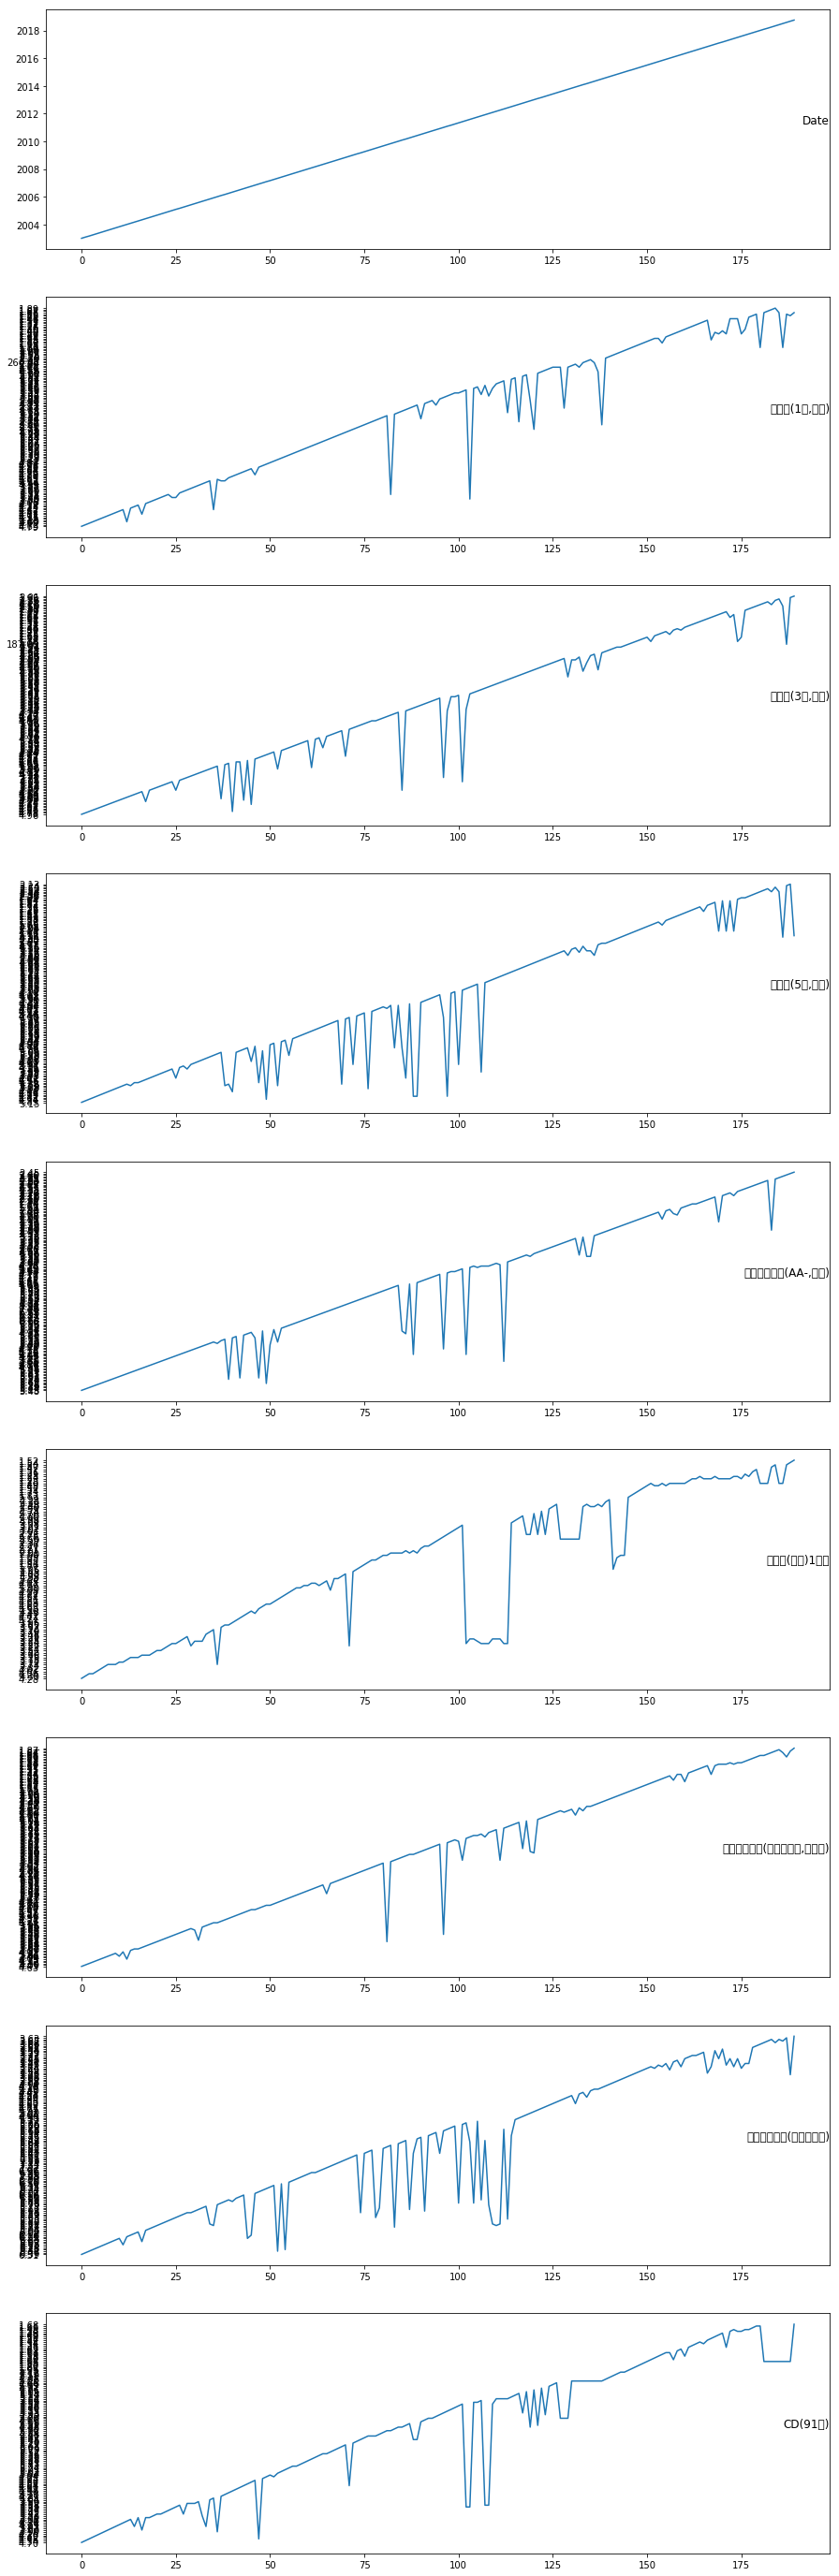

In [36]:
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9]
i = 1

plt.figure(figsize=(15,50))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(stat_file.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [38]:
#load
values = dataset.values

In [39]:
values

array([[3.29, 4.29, 4.84, ..., 5.94, 2.88, 3.58],
       [3.12, 4.19, 4.76, ..., 5.84, 2.88, 3.61],
       [2.83, 3.94, 4.47, ..., 5.69, 2.83, 3.83],
       ...,
       [1.85, 2.18, 2.44, ..., 3.65, 1.65, 2.86],
       [1.84, 2.1 , 2.34, ..., 3.67, 1.65, 2.96],
       [1.83, 2.02, 2.24, ..., 3.63, 1.65, 2.86]])

In [40]:
encoder = LabelEncoder()

In [41]:
values[:,4] = encoder.fit_transform(values[:,4])

In [42]:
values[:,4]

array([85., 84., 83., 80., 75., 78., 82., 79., 73., 65., 67., 66., 76.,
       81., 77., 77., 74., 72., 75., 70., 68., 70., 68., 68., 68., 69.,
       71., 69., 64., 63., 62., 61., 55., 54., 56., 54., 48., 46., 43.,
       41., 44., 49., 60., 57., 53., 50., 59., 58., 56., 52., 54., 54.,
       51., 47., 45., 42., 36., 30., 28., 27., 26., 23., 16.,  9., 15.,
       11., 10.,  8.,  6.,  7., 15., 17., 13.,  6.,  8.,  5.,  4.,  3.,
        0.,  0.,  1.,  2., 12., 18., 14., 16., 20., 19., 21., 20., 22.,
       24., 25., 29., 33., 31., 34., 38., 39., 36., 40., 37., 35., 32.])

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [44]:
dataset

,"국고채(1년,평균)","국고채(3년,평균)","국고채(5년,평균)","국고채(10년,평균)","회사채수익율(AA-,평균)",콜금리(평균)1일물,"예금은행수신(신규취급액,저축성)",예금은행대출(신규취급액),CD(91일),"미T/N(10년,말)"
Date,,,,,,,,,,
2010-01-01,3.29,4.29,4.84,5.35,85.0,2.00,3.87,5.94,2.88,3.58
2010-02-01,3.12,4.19,4.76,5.30,84.0,2.00,3.60,5.84,2.88,3.61
2010-03-01,2.83,3.94,4.47,4.92,83.0,2.01,3.27,5.69,2.83,3.83
2010-04-01,2.67,3.77,4.44,4.91,80.0,2.00,2.89,5.49,2.51,3.65
2010-05-01,2.73,3.70,4.41,4.95,75.0,2.01,2.89,5.40,2.45,3.29
2010-06-01,2.92,3.75,4.41,4.93,78.0,2.00,3.00,5.32,2.45,2.93
2010-07-01,3.14,3.88,4.45,4.91,82.0,2.21,3.10,5.39,2.58,2.91
2010-08-01,3.13,3.73,4.27,4.68,79.0,2.27,3.16,5.51,2.63,2.47
2010-09-01,2.99,3.48,3.91,4.28,73.0,2.27,3.08,5.45,2.66,2.51


In [45]:
price_score = pd.read_csv('./price_score.csv')
price_score = price_score.drop('Unnamed: 0', 1)

In [46]:
price_score['Date'] = pd.to_datetime(price_score['Date'])
price_score = price_score.loc[:][(price_score['Date'] >= start_cond)]
price_score = price_score.set_index('Date')

In [47]:
price_score

,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,...,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.147006,0.088715,-0.016982,0.048032,0.096976,-0.128721,-0.068935,0.132554,0.111573,-0.037524,...,0.886073,-0.034710,0.093984,-0.003769,-0.378206,0.037386,0.323217,0.185549,0.042549,0.269035
2010-02-01,0.384193,0.268047,0.076509,0.134612,0.311957,0.023324,0.016237,0.005627,0.133904,0.091081,...,0.746156,0.134745,0.231071,0.109449,0.130070,0.025780,1.178676,0.484826,0.333490,0.484020
2010-03-01,0.297798,-0.020050,-0.030413,0.202777,0.145845,-0.173701,-0.040059,0.130514,0.114371,0.000204,...,0.003454,-0.416510,-0.105130,-0.023231,0.219946,0.155029,0.154842,0.126945,0.009384,-0.147721
2010-04-01,0.204190,-0.172217,-0.252812,-0.337256,0.009248,-0.704067,-0.152174,0.052396,-0.091598,0.020742,...,-0.359767,-0.174431,-0.207837,0.008387,0.240981,0.068989,-0.091265,-0.101259,-0.226016,-0.026197
2010-05-01,0.057302,-0.364773,-0.298235,-0.500516,-0.032085,-0.538797,-0.393158,-0.015540,-0.244061,-0.018804,...,-0.883735,-0.501766,-0.331759,-0.023126,-0.223007,-0.079852,-0.366036,-0.452229,-0.409864,-0.073940
2010-06-01,-0.041612,-0.565193,-0.620457,-0.548634,-0.167483,-0.901256,-1.483742,-0.341249,-0.010222,-0.203609,...,-0.448206,-0.494864,-0.415703,-0.211789,-0.381730,-0.211312,-0.527977,-0.698964,-0.539593,-0.918317
2010-07-01,-0.101359,-0.525019,-0.514228,-0.551260,-0.158783,-0.570201,-0.998260,-0.262223,-1.120444,-0.163263,...,-0.419113,-0.862861,-0.304406,-0.658462,-0.529672,-0.045838,-0.181004,-0.316021,-1.206405,-0.979383
2010-08-01,-0.032330,-0.454296,-0.421002,0.000016,-0.202522,-0.472225,-1.194079,-0.118056,-0.122779,-0.564071,...,-0.567653,-0.420106,-0.240563,-0.214276,-0.531660,-0.081250,-0.107197,-0.697866,-0.979072,-0.454594
2010-09-01,0.157078,-0.253769,-0.306631,0.000000,-0.037750,-0.711586,-0.338133,-0.051609,-0.240003,-0.023130,...,-0.131993,-0.380804,-0.080843,-0.196525,-0.327270,-0.144538,-0.118016,-0.454807,-0.083916,-0.236918


In [48]:
loc_df = pd.read_csv('./loc_df.csv')
loc_df = loc_df.drop(['Unnamed: 0'], 1)

In [49]:
def create_dict(a, b):
    d = dict()
    #갯수 다르면
    if len(a)-len(b) != 0:
        for i in range(len(a)-len(b)):
            b.append(None)
    #갯수 같으면
    for j in range(len(a)):
        d[a[j]] = b[j]
    return d

In [50]:
def find_val_using_key(dic, key):
    if key in dic:
        return dic[key]
    else:
        print('404 not found')
        return dic['서울']

In [51]:
def find_key_using_val(dic, val):
    return [k for k, v in dic.items() if v == val][0]

In [52]:
loc_code = loc_df['구분']
loc_code_en = loc_df['Classification']

In [53]:
loc_code_dict = create_dict(loc_code, loc_code_en)

In [54]:
find_key_using_val(loc_code_dict, 'Total')

'전국'

In [55]:
def select_gu_data(df):
    gu_name = input()
    
    global GU_ENG_NAME
    name = find_val_using_key(loc_code_dict, gu_name)
    GU_ENG_NAME = name
    
    return df[[name]]    

In [57]:
gangnam_score = select_gu_data(price_score)

강남구


In [58]:
gangnam_score.head()

,Gangnam-gu
Date,
2010-01-01,0.146998
2010-02-01,0.401215
2010-03-01,0.054086
2010-04-01,-0.042543
2010-05-01,-0.678413


In [59]:
dataset['Score'] = gangnam_score['Gangnam-gu']

In [60]:
dataset = dataset.reindex(columns=['Score'] + list(dataset.columns[:-1]))

In [61]:
dataset

,Score,"국고채(1년,평균)","국고채(3년,평균)","국고채(5년,평균)","국고채(10년,평균)","회사채수익율(AA-,평균)",콜금리(평균)1일물,"예금은행수신(신규취급액,저축성)",예금은행대출(신규취급액),CD(91일),"미T/N(10년,말)"
Date,,,,,,,,,,,
2010-01-01,0.146998,3.29,4.29,4.84,5.35,85.0,2.00,3.87,5.94,2.88,3.58
2010-02-01,0.401215,3.12,4.19,4.76,5.30,84.0,2.00,3.60,5.84,2.88,3.61
2010-03-01,0.054086,2.83,3.94,4.47,4.92,83.0,2.01,3.27,5.69,2.83,3.83
2010-04-01,-0.042543,2.67,3.77,4.44,4.91,80.0,2.00,2.89,5.49,2.51,3.65
2010-05-01,-0.678413,2.73,3.70,4.41,4.95,75.0,2.01,2.89,5.40,2.45,3.29
2010-06-01,-0.567626,2.92,3.75,4.41,4.93,78.0,2.00,3.00,5.32,2.45,2.93
2010-07-01,-0.254231,3.14,3.88,4.45,4.91,82.0,2.21,3.10,5.39,2.58,2.91
2010-08-01,-0.591100,3.13,3.73,4.27,4.68,79.0,2.27,3.16,5.51,2.63,2.47
2010-09-01,-0.146213,2.99,3.48,3.91,4.28,73.0,2.27,3.08,5.45,2.66,2.51


In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [63]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [64]:
reframed = series_to_supervised(scaled, 1, 1)

In [65]:
reframed.columns.values

array(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)',
       'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)'], dtype=object)

In [66]:
reframed = reframed.drop(['var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)',
       'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)'], 1)

In [67]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.007668,0.016525,1.000000,1.000000,1.000000,0.379310,1.000000,1.000000,0.684444,0.008604,0.007026
2,0.007026,0.015987,0.977716,0.987342,0.988235,0.379310,0.894531,0.963100,0.684444,0.008726,0.005930
3,0.005930,0.014641,0.896936,0.891139,0.976471,0.384236,0.765625,0.907749,0.662222,0.009614,0.005326
4,0.005326,0.013726,0.888579,0.888608,0.941176,0.379310,0.617188,0.833948,0.520000,0.008887,0.005553
5,0.005553,0.013349,0.880223,0.898734,0.882353,0.384236,0.617188,0.800738,0.493333,0.007433,0.006270
6,0.006270,0.013618,0.880223,0.893671,0.917647,0.379310,0.660156,0.771218,0.493333,0.005979,0.007101
7,0.007101,0.014318,0.891365,0.888608,0.964706,0.482759,0.699219,0.797048,0.551111,0.005898,0.007064
8,0.007064,0.013511,0.841226,0.830380,0.929412,0.512315,0.722656,0.841328,0.573333,0.004120,0.006535
9,0.006535,0.012165,0.740947,0.729114,0.858824,0.512315,0.691406,0.819188,0.586667,0.004282,0.005817
10,0.005817,0.010873,0.671309,0.686076,0.764706,0.507389,0.664062,0.789668,0.586667,0.004646,0.006270


In [68]:
values = reframed.values
values

array([[0.0076679 , 0.01652492, 1.        , ..., 0.68444444, 0.00860432,
        0.00702576],
       [0.00702576, 0.01598665, 0.97771588, ..., 0.68444444, 0.00872551,
        0.00593035],
       [0.00593035, 0.01464097, 0.89693593, ..., 0.66222222, 0.00961422,
        0.00532598],
       ...,
       [0.00237969, 0.00554419, 0.35654596, ..., 0.13777778, 0.00569582,
        0.0022286 ],
       [0.0022286 , 0.0051674 , 0.33147632, ..., 0.13777778, 0.00569582,
        0.00219083],
       [0.00219083, 0.00473679, 0.30362117, ..., 0.13777778, 0.00609978,
        0.00215306]])

In [69]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import L1L2

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

import os

Using TensorFlow backend.


In [70]:
BASE_PATH = './TimeSeries/'
MODEL_NAME = 'multi_var_LSTM'

In [71]:
from sklearn.model_selection import TimeSeriesSplit

In [72]:
tscv = TimeSeriesSplit(n_splits=5)

In [73]:
X, y = values[:, :-1], values[:, -1]

In [74]:
MODEL_PATH = ''


if not os.path.exists(BASE_PATH):
    os.mkdir(BASE_PATH)

def create_checkpoint(model_name):
    global MODEL_PATH
    MODEL_PATH = os.path.join(BASE_PATH, model_name)
    
    MODEL_PATH = MODEL_PATH + "/" + GU_ENG_NAME
    
    print("Model_path : ", MODEL_PATH)
    
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)
    
    return ModelCheckpoint(filepath=os.path.join(MODEL_PATH, 'val_loss-{val_loss:.6f}.hdf5'),
                           monitor='val_loss',
                           verbose=1,
                           save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')

In [75]:
create_checkpoint(MODEL_NAME)

Model_path :  ./TimeSeries/multi_var_LSTM/Gangnam-gu


(18, 1, 10) (18,) (17, 1, 10) (17,)
Model_path :  ./TimeSeries/multi_var_LSTM/Gangnam-gu
Train on 18 samples, validate on 17 samples
Epoch 1/1000
 - 1s - loss: 0.0936 - val_loss: 0.0833

Epoch 00001: val_loss improved from inf to 0.08326, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.083259.hdf5
Epoch 2/1000
 - 0s - loss: 0.0746 - val_loss: 0.0643

Epoch 00002: val_loss improved from 0.08326 to 0.06431, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.064314.hdf5
Epoch 3/1000
 - 0s - loss: 0.0556 - val_loss: 0.0471

Epoch 00003: val_loss improved from 0.06431 to 0.04711, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.047109.hdf5
Epoch 4/1000
 - 0s - loss: 0.0384 - val_loss: 0.0282

Epoch 00004: val_loss improved from 0.04711 to 0.02823, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.028231.hdf5
Epoch 5/1000
 - 0s - loss: 0.0195 - val_loss: 0.0094

Epoch 00005: val_loss improved from 0.02823 to 0.00939, saving mo


Epoch 00069: val_loss did not improve from 0.00123
Epoch 70/1000
 - 0s - loss: 0.0017 - val_loss: 0.0023

Epoch 00070: val_loss did not improve from 0.00123
Epoch 71/1000
 - 0s - loss: 0.0016 - val_loss: 0.0024

Epoch 00071: val_loss did not improve from 0.00123
Epoch 72/1000
 - 0s - loss: 0.0016 - val_loss: 0.0021

Epoch 00072: val_loss did not improve from 0.00123
Epoch 73/1000
 - 0s - loss: 0.0016 - val_loss: 0.0021

Epoch 00073: val_loss did not improve from 0.00123
Epoch 74/1000
 - 0s - loss: 0.0016 - val_loss: 0.0021

Epoch 00074: val_loss did not improve from 0.00123
Epoch 75/1000
 - 0s - loss: 0.0016 - val_loss: 0.0016

Epoch 00075: val_loss did not improve from 0.00123
Epoch 76/1000
 - 0s - loss: 0.0016 - val_loss: 0.0017

Epoch 00076: val_loss did not improve from 0.00123
Epoch 77/1000
 - 0s - loss: 0.0015 - val_loss: 0.0022

Epoch 00077: val_loss did not improve from 0.00123
Epoch 78/1000
 - 0s - loss: 0.0016 - val_loss: 0.0020

Epoch 00078: val_loss did not improve from 0.

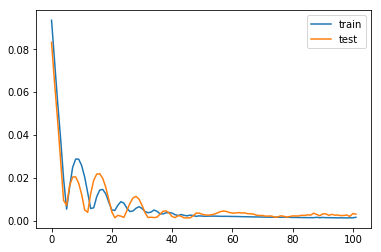

Test RMSE: 0.840
(35, 1, 10) (35,) (17, 1, 10) (17,)
Model_path :  ./TimeSeries/multi_var_LSTM/Gangnam-gu
Train on 35 samples, validate on 17 samples
Epoch 1/1000
 - 2s - loss: 0.0552 - val_loss: 0.0913

Epoch 00001: val_loss improved from inf to 0.09126, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.091257.hdf5
Epoch 2/1000
 - 0s - loss: 0.0359 - val_loss: 0.0765

Epoch 00002: val_loss improved from 0.09126 to 0.07649, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.076491.hdf5
Epoch 3/1000
 - 0s - loss: 0.0165 - val_loss: 0.0638

Epoch 00003: val_loss improved from 0.07649 to 0.06377, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.063766.hdf5
Epoch 4/1000
 - 0s - loss: 0.0034 - val_loss: 0.0689

Epoch 00004: val_loss did not improve from 0.06377
Epoch 5/1000
 - 0s - loss: 0.0149 - val_loss: 0.0710

Epoch 00005: val_loss did not improve from 0.06377
Epoch 6/1000
 - 0s - loss: 0.0187 - val_loss: 0.0702

Epoch 00006: val_loss did 

 - 0s - loss: 0.0018 - val_loss: 0.0654

Epoch 00074: val_loss did not improve from 0.06356
Epoch 75/1000
 - 0s - loss: 0.0018 - val_loss: 0.0653

Epoch 00075: val_loss did not improve from 0.06356
Epoch 76/1000
 - 0s - loss: 0.0018 - val_loss: 0.0652

Epoch 00076: val_loss did not improve from 0.06356
Epoch 77/1000
 - 0s - loss: 0.0018 - val_loss: 0.0652

Epoch 00077: val_loss did not improve from 0.06356
Epoch 78/1000
 - 0s - loss: 0.0017 - val_loss: 0.0654

Epoch 00078: val_loss did not improve from 0.06356
Epoch 79/1000
 - 0s - loss: 0.0017 - val_loss: 0.0654

Epoch 00079: val_loss did not improve from 0.06356
Epoch 80/1000
 - 0s - loss: 0.0017 - val_loss: 0.0653

Epoch 00080: val_loss did not improve from 0.06356
Epoch 81/1000
 - 0s - loss: 0.0017 - val_loss: 0.0652

Epoch 00081: val_loss did not improve from 0.06356
Epoch 82/1000
 - 0s - loss: 0.0017 - val_loss: 0.0652

Epoch 00082: val_loss did not improve from 0.06356
Epoch 83/1000
 - 0s - loss: 0.0017 - val_loss: 0.0653

Epoch

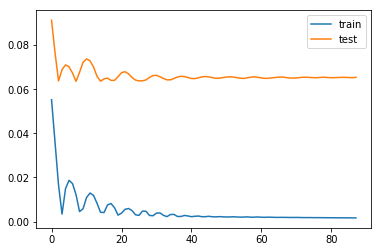

Test RMSE: 64.366
(52, 1, 10) (52,) (17, 1, 10) (17,)
Model_path :  ./TimeSeries/multi_var_LSTM/Gangnam-gu
Train on 52 samples, validate on 17 samples
Epoch 1/1000
 - 2s - loss: 0.0301 - val_loss: 0.0163

Epoch 00001: val_loss improved from inf to 0.01625, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.016252.hdf5
Epoch 2/1000
 - 0s - loss: 0.0283 - val_loss: 0.0148

Epoch 00002: val_loss improved from 0.01625 to 0.01482, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.014817.hdf5
Epoch 3/1000
 - 0s - loss: 0.0269 - val_loss: 0.0122

Epoch 00003: val_loss improved from 0.01482 to 0.01219, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.012190.hdf5
Epoch 4/1000
 - 0s - loss: 0.0261 - val_loss: 0.0106

Epoch 00004: val_loss improved from 0.01219 to 0.01057, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.010574.hdf5
Epoch 5/1000
 - 0s - loss: 0.0264 - val_loss: 0.0106

Epoch 00005: val_loss did not improve from 0.01


Epoch 00058: val_loss did not improve from 0.00490
Epoch 59/1000
 - 0s - loss: 0.0215 - val_loss: 0.0052

Epoch 00059: val_loss did not improve from 0.00490
Epoch 60/1000
 - 0s - loss: 0.0216 - val_loss: 0.0057

Epoch 00060: val_loss did not improve from 0.00490
Epoch 61/1000
 - 0s - loss: 0.0214 - val_loss: 0.0057

Epoch 00061: val_loss did not improve from 0.00490
Epoch 62/1000
 - 0s - loss: 0.0213 - val_loss: 0.0055

Epoch 00062: val_loss did not improve from 0.00490
Epoch 63/1000
 - 0s - loss: 0.0213 - val_loss: 0.0055

Epoch 00063: val_loss did not improve from 0.00490
Epoch 64/1000
 - 0s - loss: 0.0213 - val_loss: 0.0057

Epoch 00064: val_loss did not improve from 0.00490
Epoch 65/1000
 - 0s - loss: 0.0211 - val_loss: 0.0059

Epoch 00065: val_loss did not improve from 0.00490
Epoch 66/1000
 - 0s - loss: 0.0212 - val_loss: 0.0057

Epoch 00066: val_loss did not improve from 0.00490
Epoch 67/1000
 - 0s - loss: 0.0212 - val_loss: 0.0057

Epoch 00067: val_loss did not improve from 0.

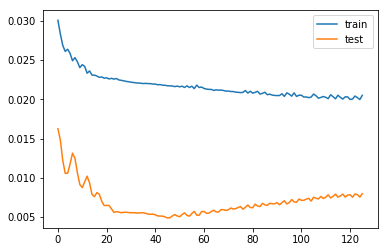

Test RMSE: 5.518
(69, 1, 10) (69,) (17, 1, 10) (17,)
Model_path :  ./TimeSeries/multi_var_LSTM/Gangnam-gu
Train on 69 samples, validate on 17 samples
Epoch 1/1000
 - 2s - loss: 0.0611 - val_loss: 0.0028

Epoch 00001: val_loss improved from inf to 0.00282, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.002825.hdf5
Epoch 2/1000
 - 0s - loss: 0.0481 - val_loss: 0.0024

Epoch 00002: val_loss improved from 0.00282 to 0.00240, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.002396.hdf5
Epoch 3/1000
 - 0s - loss: 0.0370 - val_loss: 0.0068

Epoch 00003: val_loss did not improve from 0.00240
Epoch 4/1000
 - 0s - loss: 0.0253 - val_loss: 0.0111

Epoch 00004: val_loss did not improve from 0.00240
Epoch 5/1000
 - 0s - loss: 0.0222 - val_loss: 0.0134

Epoch 00005: val_loss did not improve from 0.00240
Epoch 6/1000
 - 0s - loss: 0.0290 - val_loss: 0.0140

Epoch 00006: val_loss did not improve from 0.00240
Epoch 7/1000
 - 0s - loss: 0.0310 - val_loss: 0.0134

Epoc

 - 0s - loss: 0.0162 - val_loss: 0.0019

Epoch 00070: val_loss did not improve from 0.00120
Epoch 71/1000
 - 0s - loss: 0.0161 - val_loss: 0.0018

Epoch 00071: val_loss did not improve from 0.00120
Epoch 72/1000
 - 0s - loss: 0.0161 - val_loss: 0.0019

Epoch 00072: val_loss did not improve from 0.00120
Epoch 73/1000
 - 0s - loss: 0.0160 - val_loss: 0.0020

Epoch 00073: val_loss did not improve from 0.00120
Epoch 74/1000
 - 0s - loss: 0.0160 - val_loss: 0.0018

Epoch 00074: val_loss did not improve from 0.00120
Epoch 75/1000
 - 0s - loss: 0.0159 - val_loss: 0.0017

Epoch 00075: val_loss did not improve from 0.00120
Epoch 76/1000
 - 0s - loss: 0.0160 - val_loss: 0.0018

Epoch 00076: val_loss did not improve from 0.00120
Epoch 77/1000
 - 0s - loss: 0.0159 - val_loss: 0.0019

Epoch 00077: val_loss did not improve from 0.00120
Epoch 78/1000
 - 0s - loss: 0.0159 - val_loss: 0.0017

Epoch 00078: val_loss did not improve from 0.00120
Epoch 79/1000
 - 0s - loss: 0.0159 - val_loss: 0.0017

Epoch

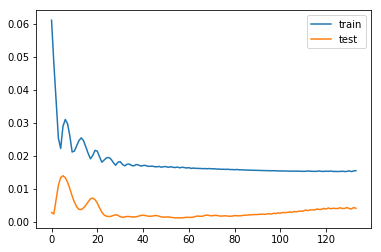

Test RMSE: 1.159
(86, 1, 10) (86,) (17, 1, 10) (17,)
Model_path :  ./TimeSeries/multi_var_LSTM/Gangnam-gu
Train on 86 samples, validate on 17 samples
Epoch 1/1000
 - 2s - loss: 0.0301 - val_loss: 0.0047

Epoch 00001: val_loss improved from inf to 0.00469, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.004691.hdf5
Epoch 2/1000
 - 0s - loss: 0.0188 - val_loss: 0.0039

Epoch 00002: val_loss improved from 0.00469 to 0.00389, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.003892.hdf5
Epoch 3/1000
 - 0s - loss: 0.0195 - val_loss: 0.0076

Epoch 00003: val_loss did not improve from 0.00389
Epoch 4/1000
 - 0s - loss: 0.0171 - val_loss: 0.0109

Epoch 00004: val_loss did not improve from 0.00389
Epoch 5/1000
 - 0s - loss: 0.0173 - val_loss: 0.0092

Epoch 00005: val_loss did not improve from 0.00389
Epoch 6/1000
 - 0s - loss: 0.0159 - val_loss: 0.0059

Epoch 00006: val_loss did not improve from 0.00389
Epoch 7/1000
 - 0s - loss: 0.0164 - val_loss: 0.0048

Epoc

Epoch 69/1000
 - 0s - loss: 0.0137 - val_loss: 0.0013

Epoch 00069: val_loss did not improve from 0.00043
Epoch 70/1000
 - 0s - loss: 0.0129 - val_loss: 7.7981e-04

Epoch 00070: val_loss did not improve from 0.00043
Epoch 71/1000
 - 0s - loss: 0.0125 - val_loss: 4.6248e-04

Epoch 00071: val_loss did not improve from 0.00043
Epoch 72/1000
 - 0s - loss: 0.0130 - val_loss: 0.0019

Epoch 00072: val_loss did not improve from 0.00043
Epoch 73/1000
 - 0s - loss: 0.0137 - val_loss: 5.6993e-04

Epoch 00073: val_loss did not improve from 0.00043
Epoch 74/1000
 - 0s - loss: 0.0126 - val_loss: 5.5522e-04

Epoch 00074: val_loss did not improve from 0.00043
Epoch 75/1000
 - 0s - loss: 0.0125 - val_loss: 0.0015

Epoch 00075: val_loss did not improve from 0.00043
Epoch 76/1000
 - 0s - loss: 0.0133 - val_loss: 4.3153e-04

Epoch 00076: val_loss improved from 0.00043 to 0.00043, saving model to ./TimeSeries/multi_var_LSTM/Gangnam-gu/val_loss-0.000432.hdf5
Epoch 77/1000
 - 0s - loss: 0.0131 - val_loss: 0.

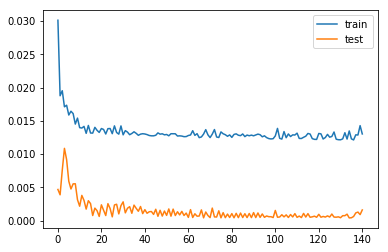

Test RMSE: 0.439


In [86]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # reshape input to be 3D [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    
    checkloss = create_checkpoint(MODEL_NAME)
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(X_train, y_train, epochs=1000, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False,
                       callbacks=[checkloss, early_stopping])
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    
    
    yhat = model.predict(X_test)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    y_test = y_test.reshape((len(y_test), 1))
    
    inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)
